## Deep Learning

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
import os
#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten,Reshape
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
import csv
from tensorflow.keras.models import Model
#import keras
from tensorflow.keras import backend as k
from tensorflow.keras.layers import Input,Concatenate,Dropout,Dense,BatchNormalization,Conv1D
from tensorflow.keras.layers import Input
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#from tensorflow.keras.merge import concatenate
#import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import scipy
from tensorflow.keras.initializers import he_normal,glorot_normal
from tensorflow.keras.regularizers import l1,l2
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint,LearningRateScheduler,ReduceLROnPlateau
from time import time
from tensorflow.keras.utils import plot_model
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from tensorflow.keras.callbacks import Callback 
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Input,Activation,BatchNormalization,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
import random as rn
import string
from sklearn.metrics import f1_score
from tensorflow import keras
import tensorflow as tf
import numpy as np
import datetime
import os
import math
import pandas as pd
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.initializers import glorot_uniform,glorot_normal
from tensorflow.keras.layers import MaxPooling1D

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
data=pd.read_csv('/content/gdrive/MyDrive/Case Study-2(Sarcastic Comments-REDDIT)/train-balanced-sarcasm.csv')
data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [4]:
data.isnull().sum()

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [5]:
data['comment']=data['comment'].fillna('No Comment')

In [6]:
# Remove Emoji
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [7]:
def decontractions(phrase):
    """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
from nltk.corpus import stopwords
from tqdm import tqdm
import re
stopwords = stopwords.words('english')
def preprocess(text_col,stopword):
    preprocessed = []
    for sentence in tqdm(text_col.values):
        # Replace "carriage return" with "space".
        sentence=str(sentence)
        sent = sentence.replace('\\r', ' ')
        # Replace "quotes" with "space".
        sent = sent.replace('\\"', ' ')
        # Replace "line feed" with "space".
        sent = sent.replace('\\n', ' ')
        # Replace characters between words with "space".
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        #remove stop words
        #decontraction
        sent=decontractions(sent)
        #Remove emoji
        sent=deEmojify(sent)
        if stopword:
            sent = ' '.join(e for e in sent.split() if e not in stopwords)
        else:
           sent = ' '.join(e for e in sent.split())
        # to lowercase
        preprocessed.append(sent.lower().strip())
    return preprocessed

In [10]:
data['comment']=preprocess(data['comment'],stopword=False)

100%|██████████| 1010826/1010826 [00:29<00:00, 33972.08it/s]


In [11]:
data['parent_comment']=preprocess(data['parent_comment'],stopword=False)

100%|██████████| 1010826/1010826 [00:37<00:00, 27206.37it/s]


In [12]:
data.isnull().sum()

label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64

In [13]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Polarity Score

In [14]:
import nltk
from tqdm import tqdm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def generate_sentiment_scores(data):
    sid = SentimentIntensityAnalyzer()
    neg=[]
    pos=[]
    neu=[]
    comp=[]
    for sentence in tqdm(data['parent_comment'].values): 
        sentence_sentiment_score = sid.polarity_scores(sentence)
        comp.append(sentence_sentiment_score['compound'])
        neg.append(sentence_sentiment_score['neg'])
        pos.append(sentence_sentiment_score['pos'])
        neu.append(sentence_sentiment_score['neu'])
    return comp,neg,pos,neu

In [15]:
data['compound'],data['negative'],data['positive'],data['neutral']=generate_sentiment_scores(data)

100%|██████████| 1010826/1010826 [04:55<00:00, 3422.41it/s]


In [16]:
data['com_len']=data['comment'].apply(lambda x:len(x.split()))

In [17]:
data['parent_com_len']=data['parent_comment'].apply(lambda x:len(x.split()))

In [18]:
data['comment']=data['comment']+" "+data['author']+" "+data['subreddit']

In [19]:
labels=tf.keras.utils.to_categorical(data['label'].values,num_classes=2)
labels.shape

(1010826, 2)

In [20]:
y=data['label']
X=data.drop(['label','date','created_utc'],axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,labels,test_size=0.3,random_state=42,stratify=labels)

In [22]:
def pad_text(text,tokenizer,max_len):
    return pad_sequences(tokenizer.texts_to_sequences(text),maxlen=max_len,padding='post')

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
def text_padding(train,test,max_len):
    token=Tokenizer(num_words = max_len,oov_token='OOV')
    token.fit_on_texts(train)
    padded_train_text=pad_text(train,token,max_len)
    padded_test_text=pad_text(test,token,max_len)
    return padded_train_text,padded_test_text,token

In [24]:
comm_len=500
train_com_pad,test_com_pad,token_com= text_padding(X_train['comment'],X_test['comment'],comm_len)

In [25]:
print(train_com_pad.shape,test_com_pad.shape)

(707578, 500) (303248, 500)


In [26]:
par_comm_len=500
train_par_com_pad,test_par_com_pad,token_par= text_padding(X_train['parent_comment'],X_test['parent_comment'],par_comm_len)

In [27]:
print(train_par_com_pad.shape,test_par_com_pad.shape)

(707578, 500) (303248, 500)


In [28]:
par_comm_len=200
train_par_com_pad,test_par_com_pad,token_par= text_padding(X_train['parent_comment'],X_test['parent_comment'],par_comm_len)

In [29]:
print(train_par_com_pad.shape,test_par_com_pad.shape)

(707578, 200) (303248, 200)


In [30]:
%%time
from sklearn.preprocessing import Normalizer
trans = Normalizer()
X_train_score=trans.fit_transform(X_train['score'].values.reshape(-1,1))
X_test_score=trans.transform(X_test['score'].values.reshape(-1,1))

CPU times: user 16.2 ms, sys: 0 ns, total: 16.2 ms
Wall time: 15.8 ms


In [31]:
%%time
trans = Normalizer()
X_train_ups=trans.fit_transform(X_train['ups'].values.reshape(-1,1))
X_test_ups=trans.transform(X_test['ups'].values.reshape(-1,1))

CPU times: user 12.5 ms, sys: 1.98 ms, total: 14.5 ms
Wall time: 14.2 ms


In [32]:
%%time
trans = Normalizer()
X_train_downs=trans.fit_transform(X_train['downs'].values.reshape(-1,1))
X_test_downs=trans.transform(X_test['downs'].values.reshape(-1,1))

CPU times: user 15.7 ms, sys: 0 ns, total: 15.7 ms
Wall time: 15.8 ms


In [33]:
%%time
trans = Normalizer()
X_train_comp=trans.fit_transform(X_train['compound'].values.reshape(-1,1))
X_test_comp=trans.transform(X_test['compound'].values.reshape(-1,1))

CPU times: user 24.2 ms, sys: 1.01 ms, total: 25.2 ms
Wall time: 21.9 ms


In [34]:
%%time
trans = Normalizer()
X_train_neg=trans.fit_transform(X_train['negative'].values.reshape(-1,1))
X_test_neg=trans.transform(X_test['negative'].values.reshape(-1,1))

CPU times: user 21.1 ms, sys: 0 ns, total: 21.1 ms
Wall time: 21.9 ms


In [35]:
%%time
trans = Normalizer()
X_train_pos=trans.fit_transform(X_train['positive'].values.reshape(-1,1))
X_test_pos=trans.transform(X_test['positive'].values.reshape(-1,1))

CPU times: user 19.8 ms, sys: 1.02 ms, total: 20.8 ms
Wall time: 20.5 ms


In [36]:
%%time
trans = Normalizer()
X_train_neu=trans.fit_transform(X_train['neutral'].values.reshape(-1,1))
X_test_neu=trans.transform(X_test['neutral'].values.reshape(-1,1))

CPU times: user 15.4 ms, sys: 9 µs, total: 15.4 ms
Wall time: 17.4 ms


In [37]:
%%time
trans = Normalizer()
X_train_com_len=trans.fit_transform(X_train['com_len'].values.reshape(-1,1))
X_test_com_len=trans.transform(X_test['com_len'].values.reshape(-1,1))

CPU times: user 12.6 ms, sys: 1.01 ms, total: 13.6 ms
Wall time: 13.7 ms


In [38]:
%%time
trans = Normalizer()
X_train_parent_com_len=trans.fit_transform(X_train['parent_com_len'].values.reshape(-1,1))
X_test_parent_com_len=trans.transform(X_test['parent_com_len'].values.reshape(-1,1))

CPU times: user 12.1 ms, sys: 988 µs, total: 13.1 ms
Wall time: 13.2 ms


In [39]:
numerical_train=np.concatenate((X_train_score,X_train_ups,X_train_downs,X_train_comp,X_train_neu,X_train_neg,X_train_pos,X_train_com_len,X_train_parent_com_len),axis=1)
numerical_test=np.concatenate((X_test_score,X_test_ups,X_test_downs,X_test_comp,X_test_neu,X_test_neg,X_test_pos,X_test_com_len,X_test_parent_com_len),axis=1)

In [40]:
print(numerical_train.shape,numerical_test.shape)

(707578, 9) (303248, 9)


In [41]:
X_train=[train_com_pad,train_par_com_pad,numerical_train]
X_test=[test_com_pad,test_par_com_pad,numerical_test]

# **Model:-1**

#### CNN1D without Embedding dimension

In [48]:
def Deep_CNN1D():
    input_1 = Input(shape=(500,),name = 'input_comment')
    emb_text_layer_1 = Embedding(input_dim = 500,output_dim = 100,input_length = 500)(input_1)
    emb_text_layer_1 = Dropout(0.4)(emb_text_layer_1)
    conv1_1 = Conv1D(128,8,1,activation='relu',kernel_initializer=glorot_uniform(seed=42))(emb_text_layer_1)
    max1_1 = MaxPooling1D(pool_size= 4,)(conv1_1)
    conv1_2 = Conv1D(64,4,1,activation='relu',kernel_initializer=glorot_uniform(seed=42))(max1_1)
    max1_2 = MaxPooling1D(4)(conv1_2)
    #lstm_output = LSTM(32, return_sequences = True,name= "LSTM",kernel_initializer=glorot_uniform(seed=42))(max2)
    flatten_1 = Flatten()(max1_2)

    # creating layers for parent comment data
    input_2 = Input(shape=(200,),name = 'input_parent_comment')
    emb_text_layer_2 = Embedding(input_dim = 500,output_dim = 100,input_length = 200)(input_2)
    emb_text_layer_2 = Dropout(0.4)(emb_text_layer_2)
    conv2_1 = Conv1D(128,8,1,activation='relu',kernel_initializer=glorot_uniform(seed=42))(emb_text_layer_2)
    max2_1 = MaxPooling1D(pool_size= 4,)(conv2_1)
    conv2_2 = Conv1D(64,4,1,activation='relu',kernel_initializer=glorot_uniform(seed=42))(max2_1)
    max2_2 = MaxPooling1D(4)(conv2_2)
    #lstm_output2 = LSTM(256, return_sequences = True, dropout = 0.5,name= "LSTM2")(emb_text_layer2)
    flatten_2 = Flatten()(max2_2)

    # creating layers for numerical columns
    input_3 = Input(shape=(9,), name = "input_numerical")
    dense_num_layer = Dense(128, activation = "relu")(input_3)

    concatenated_layer = keras.layers.concatenate([flatten_1,flatten_2,dense_num_layer],axis=-1)

    # creating further layers
    x = Dense(128, activation = 'relu',kernel_initializer=glorot_uniform(seed=42))(concatenated_layer)
    x = Dense(64, activation = 'relu',kernel_initializer=glorot_uniform(seed=42))(x)
    x = Dense(32, activation = 'relu',kernel_initializer=glorot_uniform(seed=42))(x)
    x = Dense(16, activation = 'relu',kernel_initializer=glorot_uniform(seed=42))(x)
    output = Dense(2, activation = 'softmax', name= 'model_output',kernel_initializer=glorot_uniform(seed=42))(x)
    model = Model(inputs = [input_1,input_2,input_3], outputs = [output])
    return model

In [49]:
model=Deep_CNN1D()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_comment (InputLayer)      [(None, 500)]        0                                            
__________________________________________________________________________________________________
input_parent_comment (InputLaye [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 500, 100)     50000       input_comment[0][0]              
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 200, 100)     50000       input_parent_comment[0][0]       
____________________________________________________________________________________________

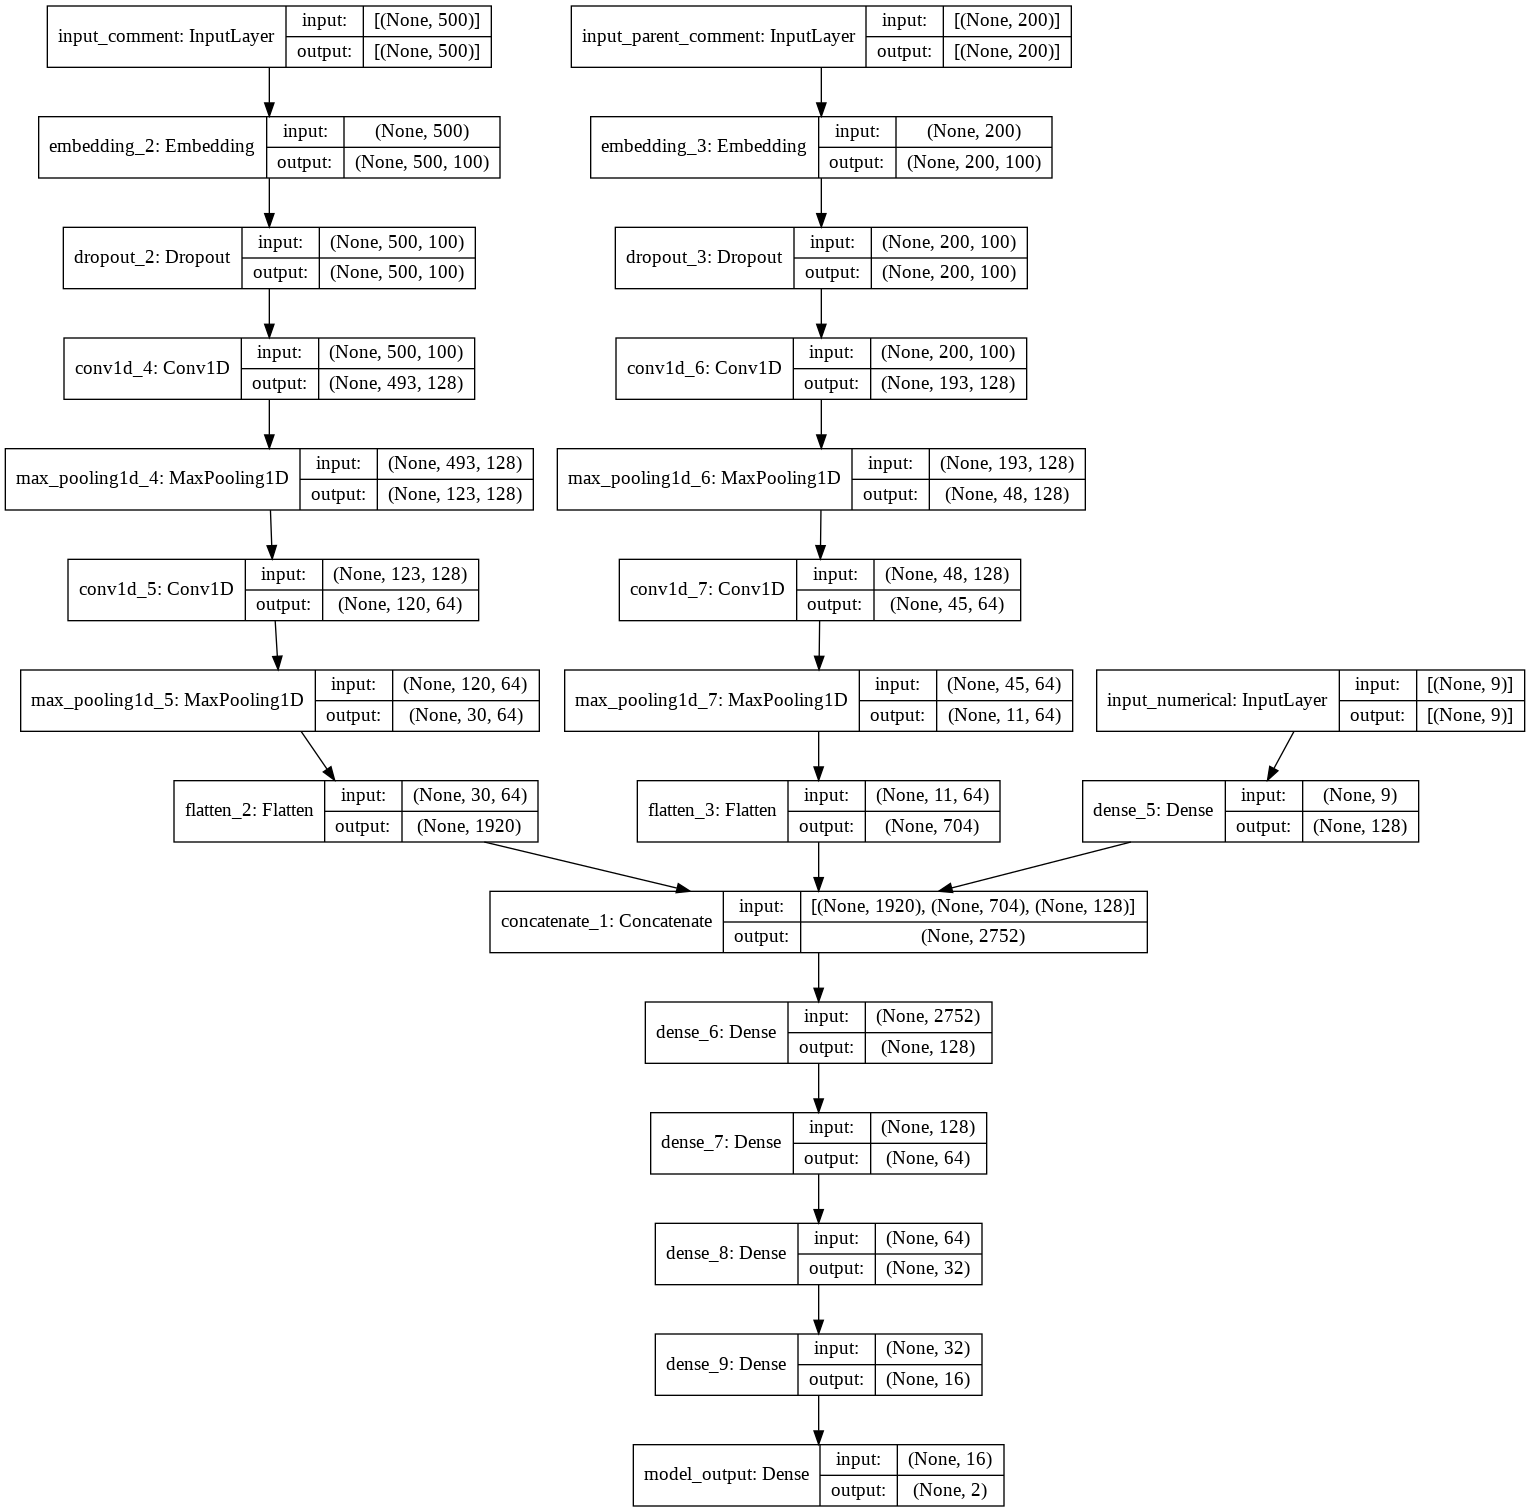

In [50]:

tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB')

In [52]:
import tensorflow as tf
adam = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
from tensorflow.keras.callbacks import *
import os
filepath="weights_1.best.hdf1"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, mode='max')
earlystop = EarlyStopping(monitor = 'val_accuracy',  mode="max",min_delta = 0, patience = 3,verbose = 1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.25, patience = 2, verbose = 1)
%reload_ext tensorboard
import datetime
logdir = os.path.join("logs_1", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
tensorboard = TensorBoard(log_dir=logdir, histogram_freq=0, write_graph=True, write_grads=False, write_images=False)
callbacks = [checkpoint,reduce_lr,tensorboard,earlystop]

In [53]:
hitory=model.fit(x=X_train,y=y_train,epochs=50,batch_size=512,validation_data=(X_test, y_test),callbacks=callbacks)

Epoch 1/50
1382/1382 [==============================] - 175s 114ms/step - loss: 0.6219 - accuracy: 0.6424 - val_loss: 0.5889 - val_accuracy: 0.6843

Epoch 00001: saving model to weights_1.best.hdf1
INFO:tensorflow:Assets written to: weights_1.best.hdf1/assets
Epoch 2/50
1382/1382 [==============================] - 159s 115ms/step - loss: 0.5847 - accuracy: 0.6847 - val_loss: 0.5820 - val_accuracy: 0.6885

Epoch 00002: saving model to weights_1.best.hdf1
INFO:tensorflow:Assets written to: weights_1.best.hdf1/assets
Epoch 3/50
1382/1382 [==============================] - 159s 115ms/step - loss: 0.5787 - accuracy: 0.6898 - val_loss: 0.5753 - val_accuracy: 0.6942

Epoch 00003: saving model to weights_1.best.hdf1
INFO:tensorflow:Assets written to: weights_1.best.hdf1/assets
Epoch 4/50
1382/1382 [==============================] - 159s 115ms/step - loss: 0.5739 - accuracy: 0.6944 - val_loss: 0.5728 - val_accuracy: 0.6973

Epoch 00004: saving model to weights_1.best.hdf1
INFO:tensorflow:Assets

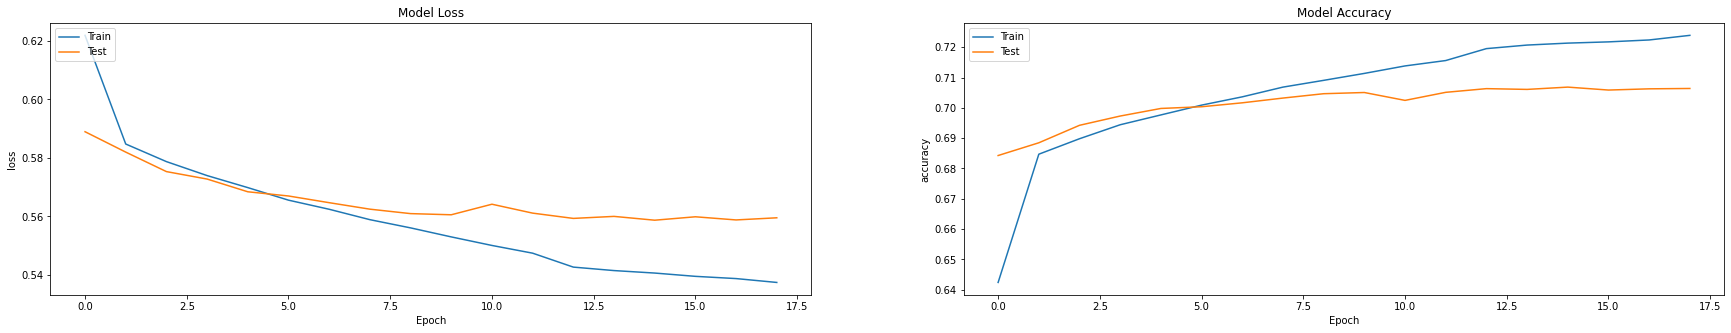

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(hitory.history['loss'])
plt.plot(hitory.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation f1_score
plt.subplot(122)
plt.plot(hitory.history['accuracy'])
plt.plot(hitory.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# **Model:-2**

In [64]:
def Deep_CNN1D2():
    input_1 = Input(shape=(500,),name = 'input_comment')
    embedding_layer_1 = Embedding(input_dim = 500,output_dim = 100,input_length = 500)(input_1)
    conv_1_1 = Conv1D(32,3,strides=2, padding='same',activation='relu')(embedding_layer_1)
    conv_1_2 = Conv1D(16,3, strides=2, padding='same',activation='relu')(embedding_layer_1)
    conv_1_3 = Conv1D(8,3, strides=2, padding='same',activation='relu')(embedding_layer_1)
    concate_1 = keras.layers.Concatenate(axis=-1)([conv_1_1, conv_1_2, conv_1_3])
    pool_1 = keras.layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(concate_1)
    conv_2_1 = keras.layers.Conv1D(8,7, strides=2, padding='same',activation='relu')(pool_1)
    conv_2_2 = keras.layers.Conv1D(16,5, strides=2, padding='same',activation='relu')(pool_1) 
    conv_2_3 = keras.layers.Conv1D(32,3, strides=2, padding='same',activation='relu')(pool_1)
    concate_2 = keras.layers.Concatenate(axis=-1)([conv_2_1, conv_2_2, conv_2_3])
    pool_2 = keras.layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(concate_2)
    conv_3 = Conv1D(20,3,strides=2, padding='same')(pool_2)
    flatten_1 = Flatten()(conv_3)

    # creating layers for parent comment data
    input_2 = Input(shape=(200,),name = 'input_parent_comment')
    embedding_layer_2 = Embedding(input_dim = 500,output_dim = 100,input_length = 200)(input_2)
    conv_1_1 = Conv1D(32,3,strides=2, padding='same',activation='relu')(embedding_layer_2)
    conv_1_2 = Conv1D(16,3, strides=2, padding='same',activation='relu')(embedding_layer_2)
    conv_1_3 = Conv1D(8,3, strides=2, padding='same',activation='relu')(embedding_layer_2)
    concate_1 = keras.layers.Concatenate(axis=-1)([conv_1_1, conv_1_2, conv_1_3])
    pool_1 = keras.layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(concate_1)
    conv_2_1 = keras.layers.Conv1D(8,7, strides=2, padding='same',activation='relu')(pool_1)
    conv_2_2 = keras.layers.Conv1D(16,5, strides=2, padding='same',activation='relu')(pool_1) 
    conv_2_3 = keras.layers.Conv1D(32,3, strides=2, padding='same',activation='relu')(pool_1)
    concate_2 = keras.layers.Concatenate(axis=-1)([conv_2_1, conv_2_2, conv_2_3])
    pool_2 = keras.layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(concate_2)
    conv_131 = Conv1D(20,3,strides=2, padding='same')(pool_2)
    flatten_2 = Flatten()(conv_131)

    # creating layers for numerical columns
    input_3 = Input(shape=(9,), name = "input_numerical")
    dense_num_layer = Dense(128, activation = "relu")(input_3)

    concatenated_layer = keras.layers.concatenate([flatten_1,flatten_2,dense_num_layer],axis=-1)

    # creating further layers
    x = Dense(128, activation = 'relu',kernel_initializer=glorot_uniform(seed=42))(concatenated_layer)
    x = BatchNormalization()(x)
    x = Dense(64, activation = 'relu',kernel_initializer=glorot_uniform(seed=42))(x)
    x = BatchNormalization()(x)
    x = Dense(32, activation = 'relu',kernel_initializer=glorot_uniform(seed=42))(x)
    x = BatchNormalization()(x)
    x = Dense(16, activation = 'relu',kernel_initializer=glorot_uniform(seed=42))(x)
    output = Dense(2, activation = 'softmax', name= 'model_output',kernel_initializer=glorot_uniform(seed=42))(x)
    model = Model(inputs = [input_1,input_2,input_3], outputs = [output])
    return model

In [65]:
model1=Deep_CNN1D2()
model1.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_comment (InputLayer)      [(None, 500)]        0                                            
__________________________________________________________________________________________________
input_parent_comment (InputLaye [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 500, 100)     50000       input_comment[0][0]              
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 200, 100)     50000       input_parent_comment[0][0]       
____________________________________________________________________________________________

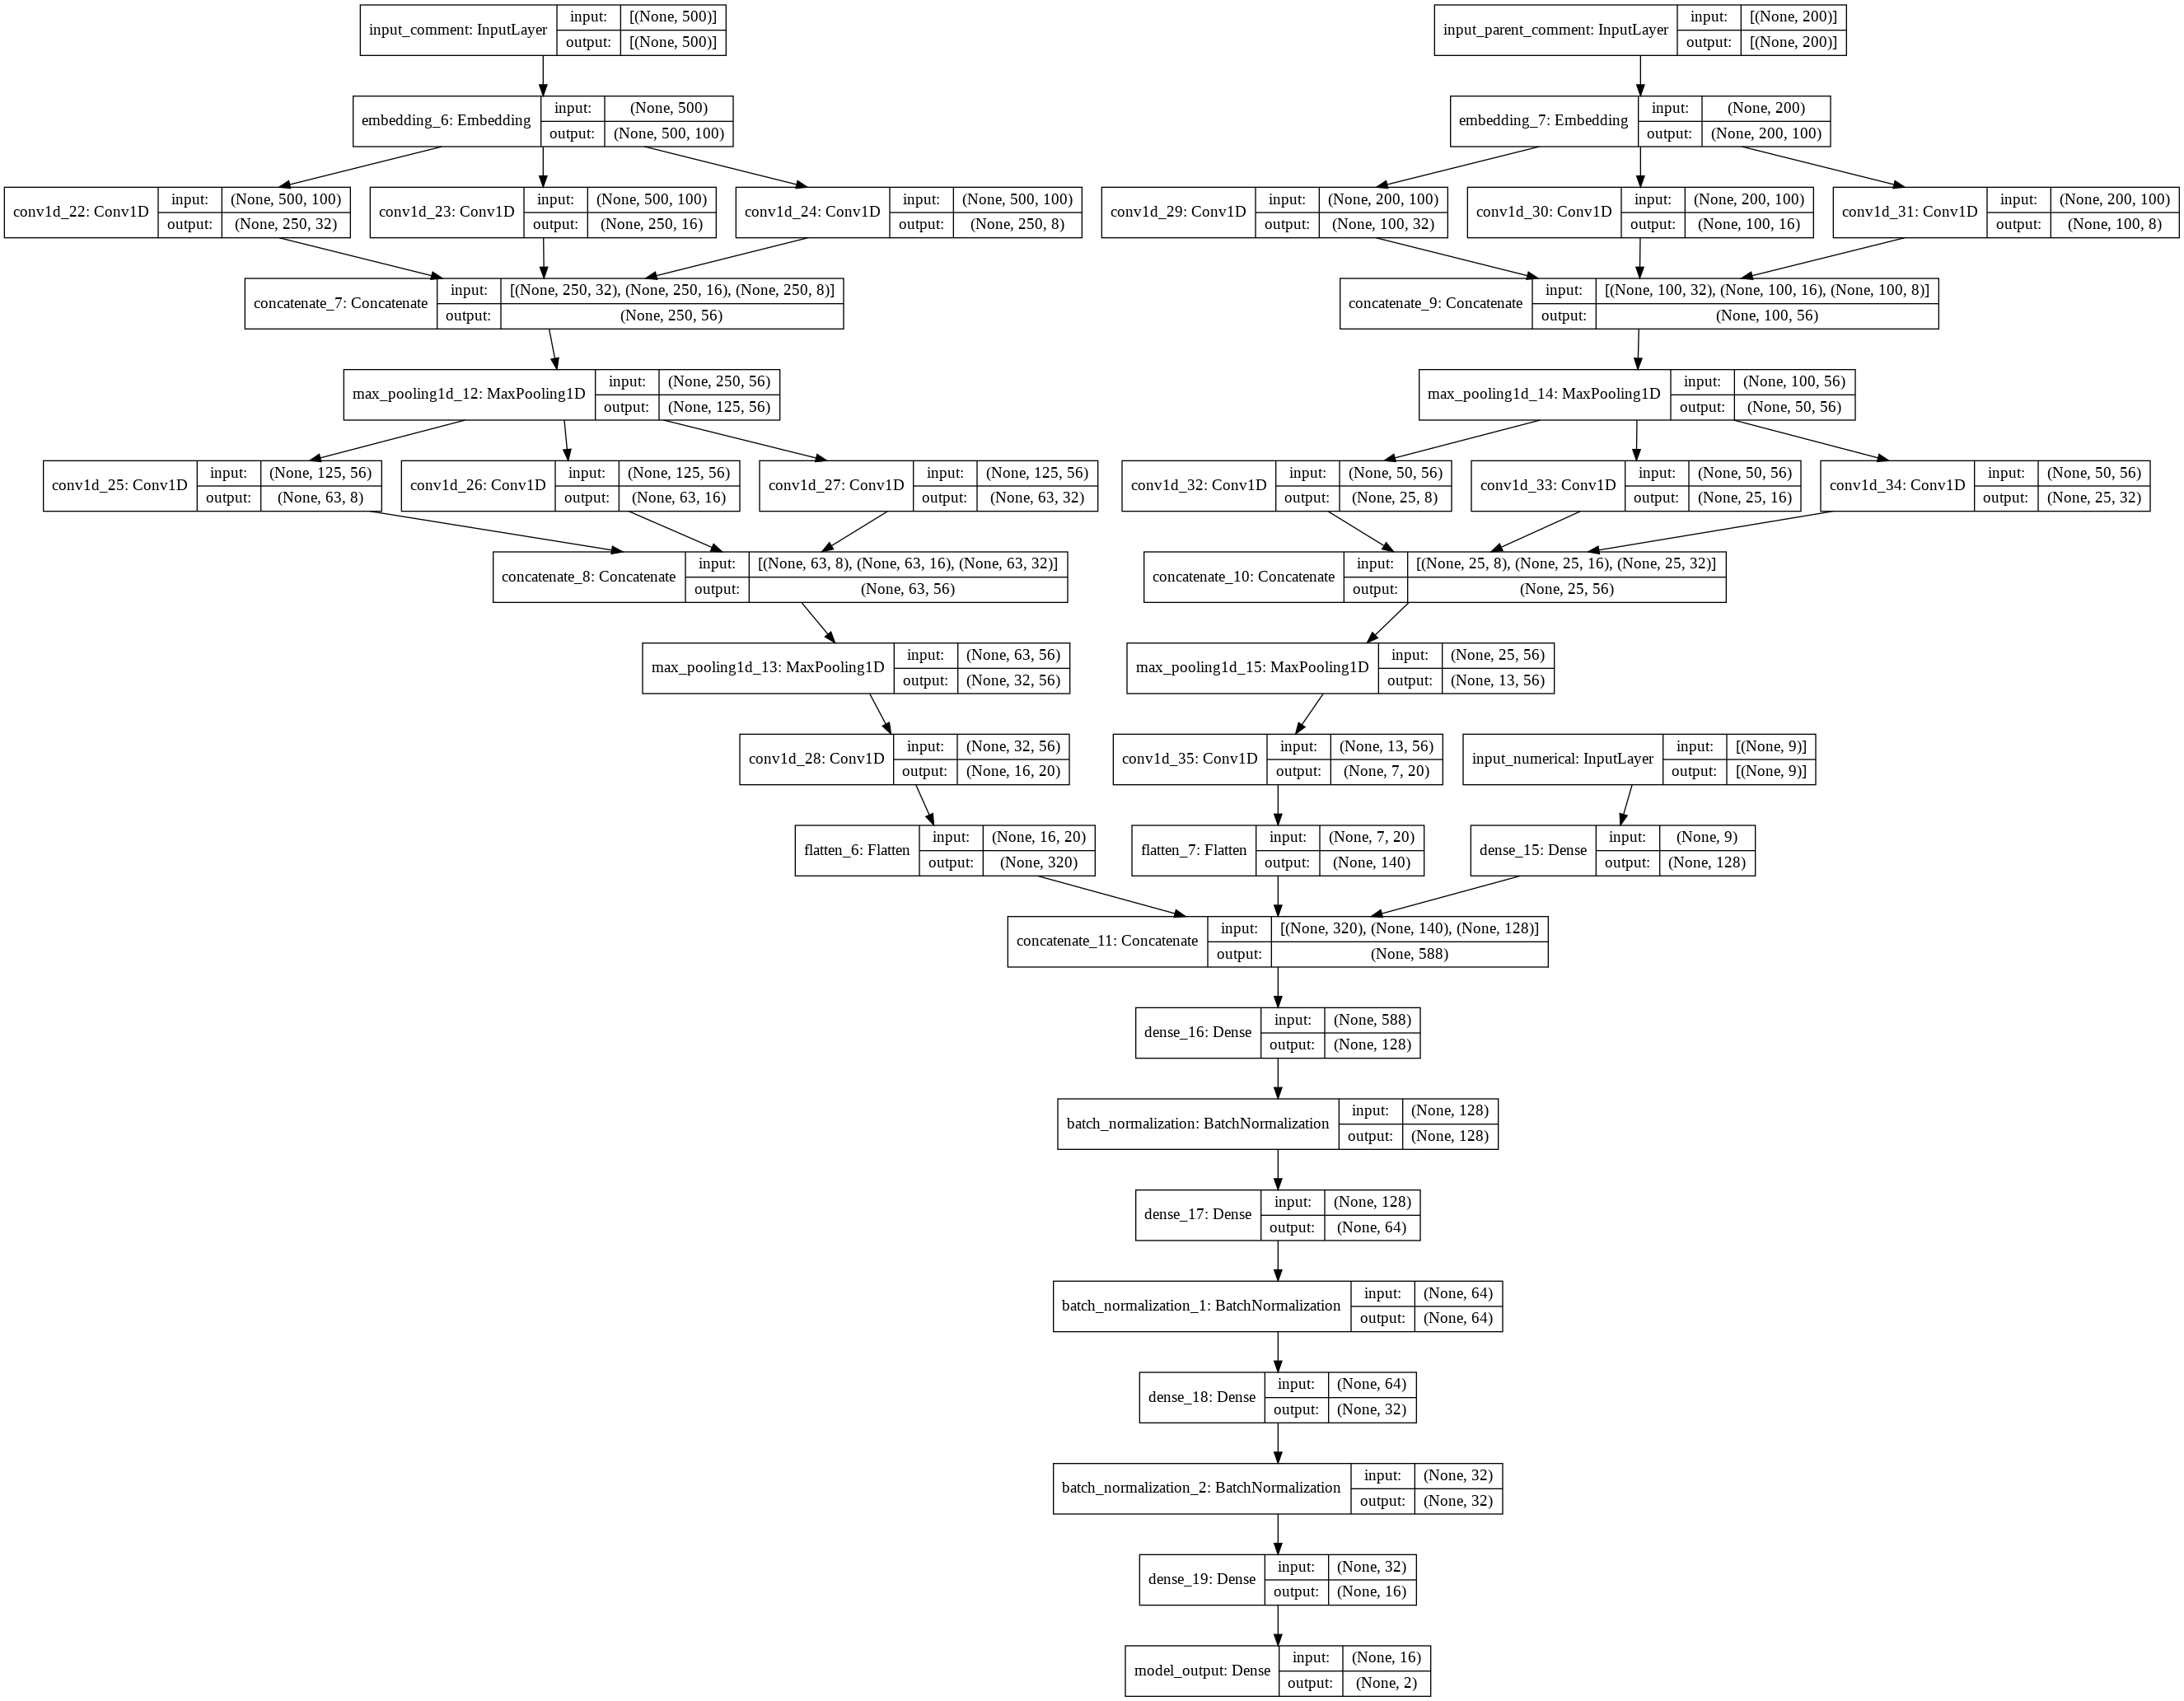

In [66]:
tf.keras.utils.plot_model(
    model1, to_file='model1.png', show_shapes=True, show_layer_names=True,
    rankdir='TB')

In [67]:
import tensorflow as tf
adam = tf.keras.optimizers.Adam(lr=0.0001)
model1.compile(optimizer=adam, loss='categorical_crossentropy',metrics=['accuracy'])

In [68]:
from tensorflow.keras.callbacks import *
import os
filepath="weights_11.best.hdf1"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, mode='max')
earlystop = EarlyStopping(monitor = 'val_accuracy',  mode="max",min_delta = 0, patience = 3,verbose = 1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.25, patience = 2, verbose = 1)
%reload_ext tensorboard
import datetime
logdir = os.path.join("logs_11", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
tensorboard = TensorBoard(log_dir=logdir, histogram_freq=0, write_graph=True, write_grads=False, write_images=False)
callbacks = [checkpoint,reduce_lr,tensorboard,earlystop]

In [69]:
hitory1=model1.fit(x=X_train,y=y_train,epochs=50,batch_size=512,validation_data=(X_test, y_test),callbacks=callbacks)

Epoch 1/50
1382/1382 [==============================] - 131s 93ms/step - loss: 0.6185 - accuracy: 0.6488 - val_loss: 0.5877 - val_accuracy: 0.6839

Epoch 00001: saving model to weights_11.best.hdf1
INFO:tensorflow:Assets written to: weights_11.best.hdf1/assets
Epoch 2/50
1382/1382 [==============================] - 138s 100ms/step - loss: 0.5773 - accuracy: 0.6925 - val_loss: 0.5792 - val_accuracy: 0.6899

Epoch 00002: saving model to weights_11.best.hdf1
INFO:tensorflow:Assets written to: weights_11.best.hdf1/assets
Epoch 3/50
1382/1382 [==============================] - 138s 100ms/step - loss: 0.5669 - accuracy: 0.7010 - val_loss: 0.5735 - val_accuracy: 0.6956

Epoch 00003: saving model to weights_11.best.hdf1
INFO:tensorflow:Assets written to: weights_11.best.hdf1/assets
Epoch 4/50
1382/1382 [==============================] - 137s 99ms/step - loss: 0.5590 - accuracy: 0.7073 - val_loss: 0.5758 - val_accuracy: 0.6946

Epoch 00004: saving model to weights_11.best.hdf1
INFO:tensorflow:A

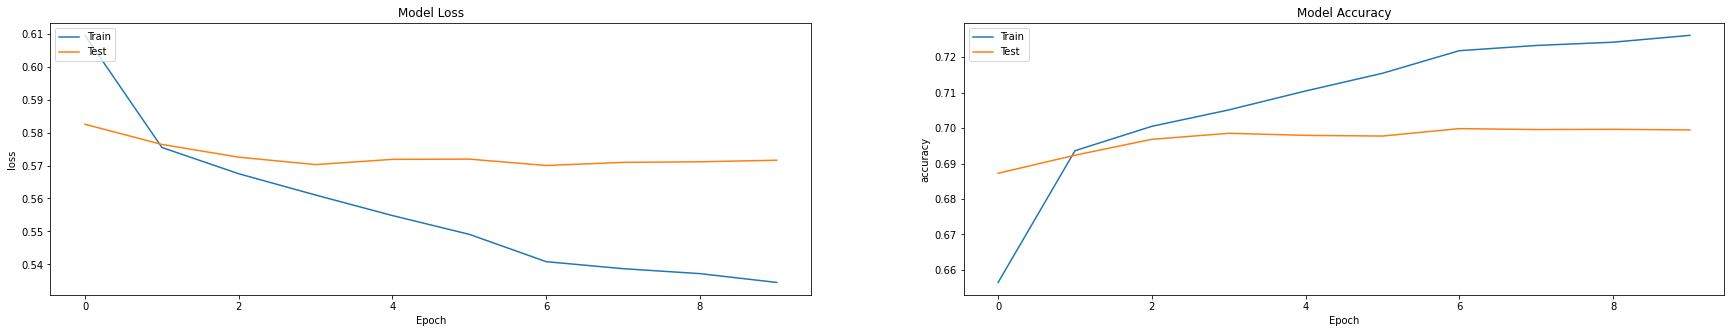

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(hitory1.history['loss'])
plt.plot(hitory1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation f1_score
plt.subplot(122)
plt.plot(hitory1.history['accuracy'])
plt.plot(hitory1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()